In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tkinter as tk
from tkinter import ttk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Load and prepare data
def load_data():
    df = pd.read_csv('data.csv')  # Changed to read_csv
    X = df[['location', 'total_sqft', 'bath', 'bhk']]
    y = df['price']
    return X, y, df

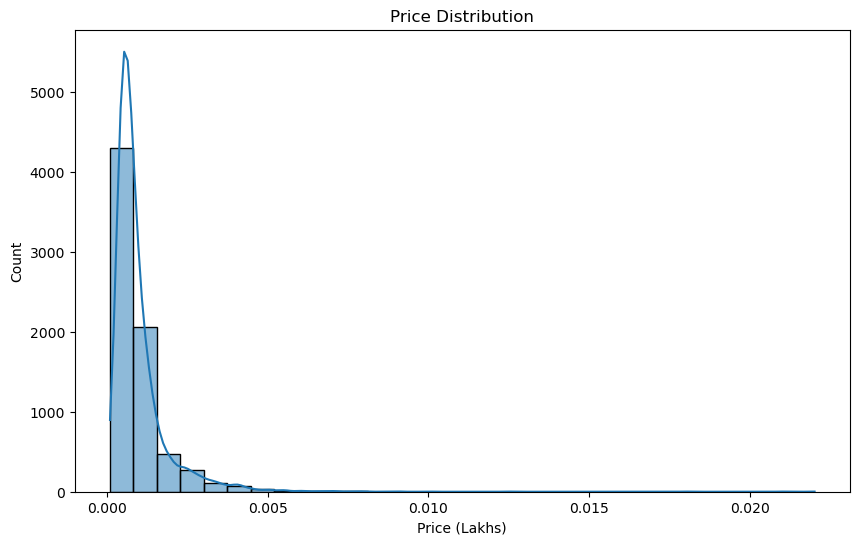

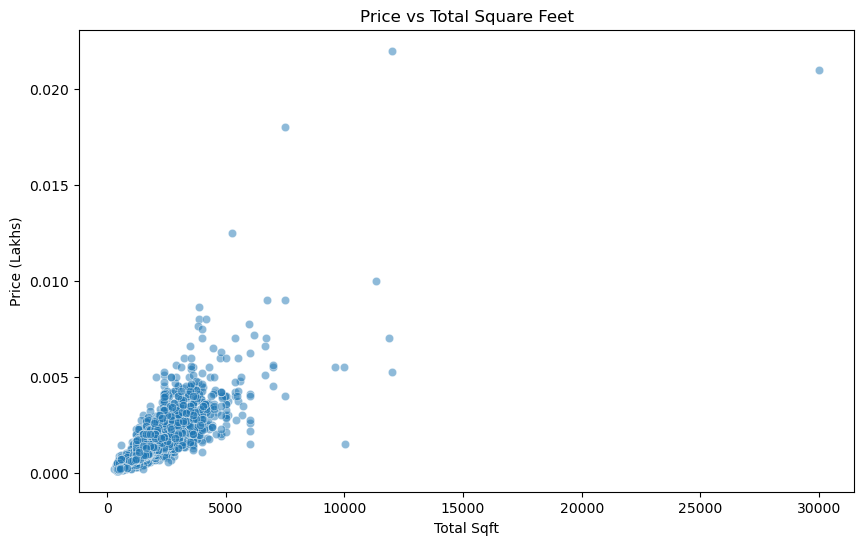

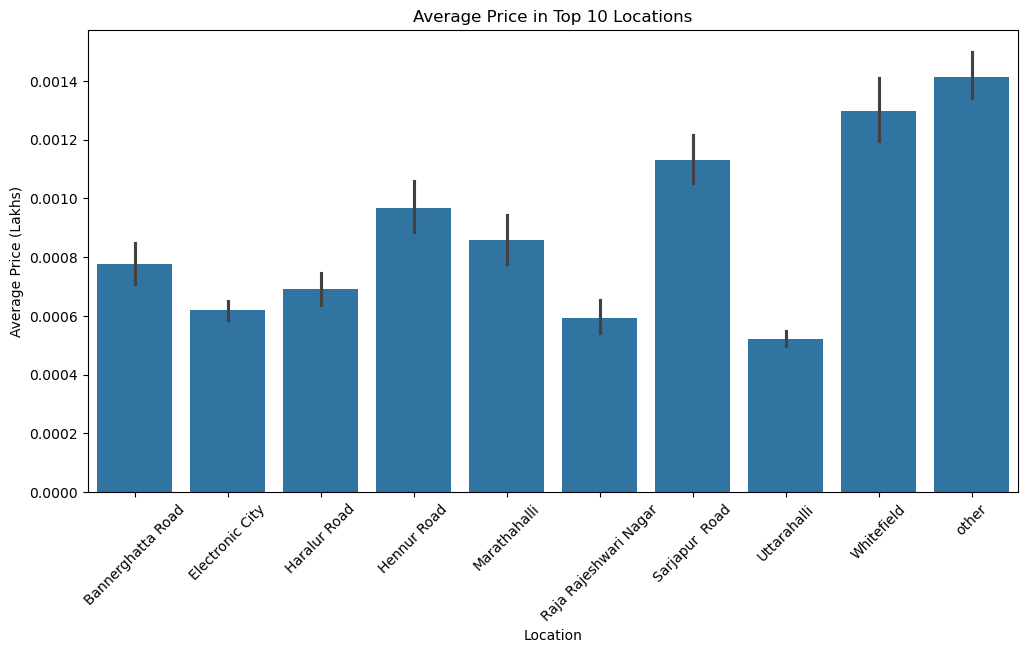

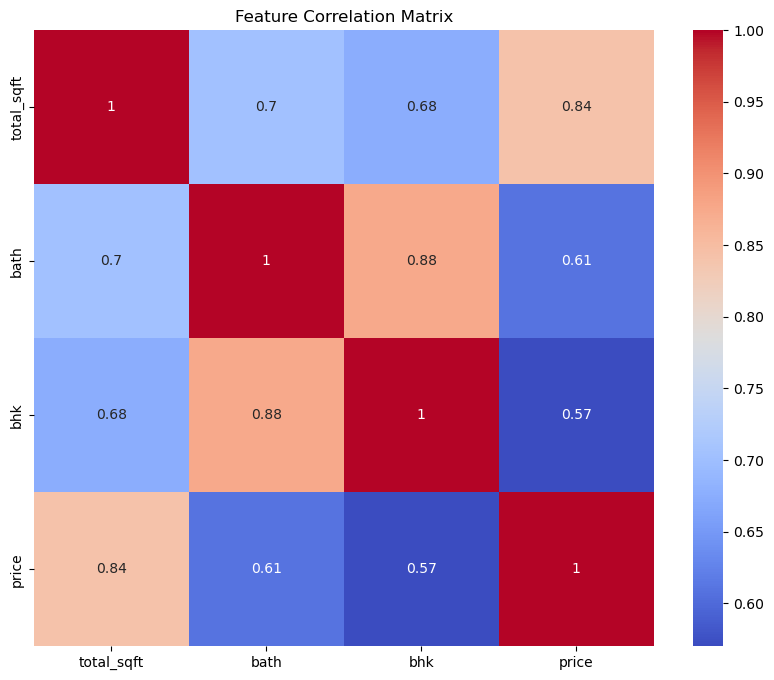

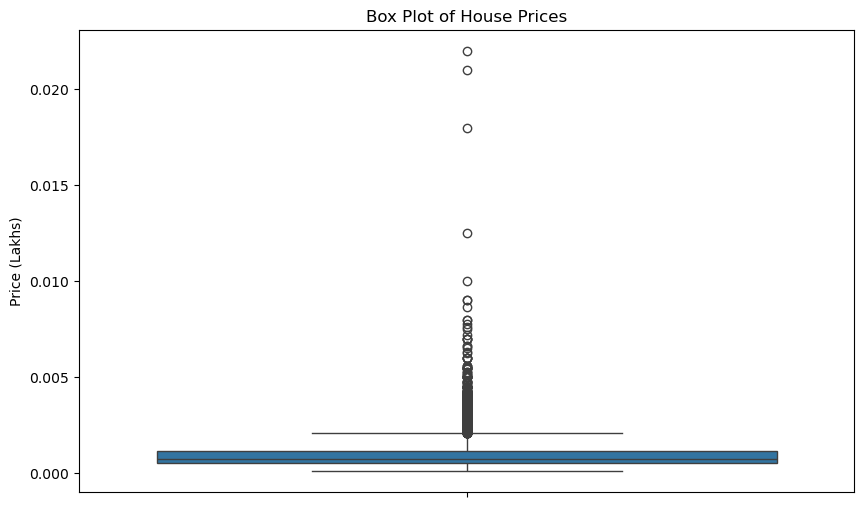

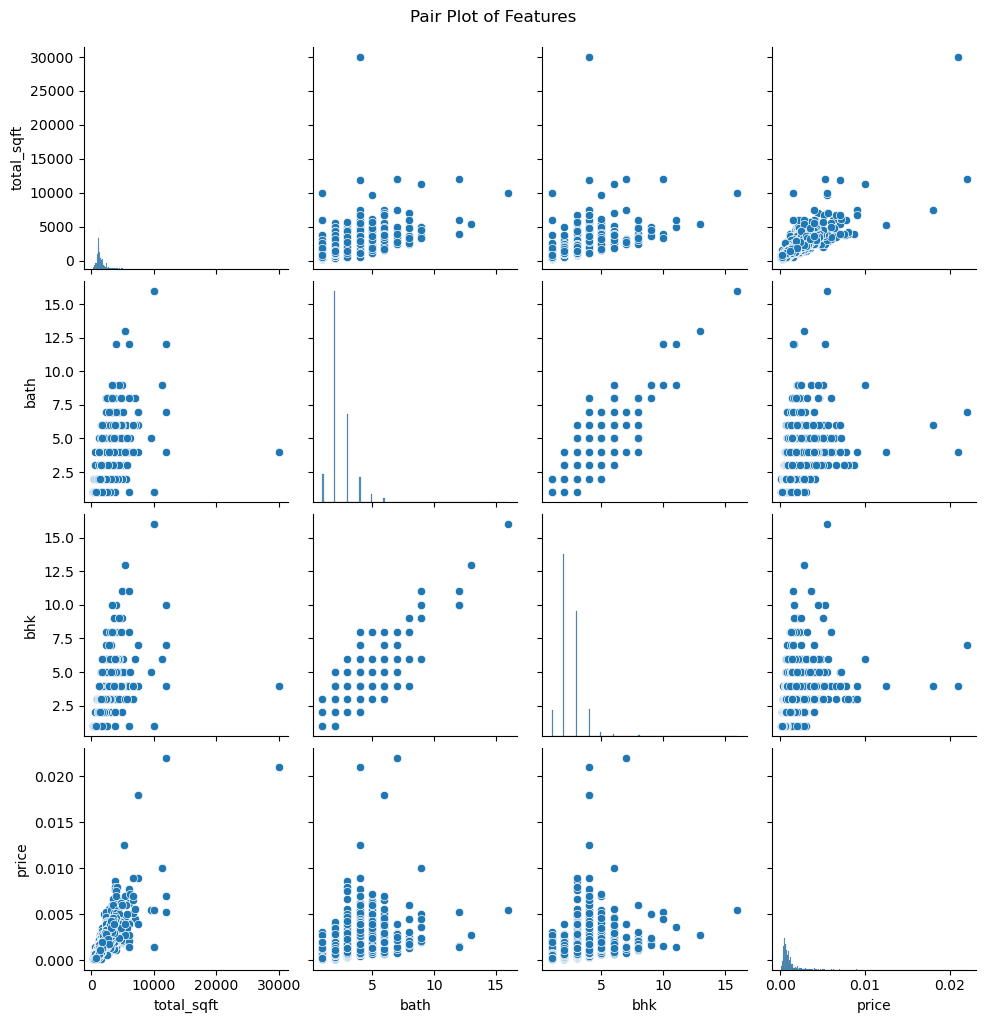

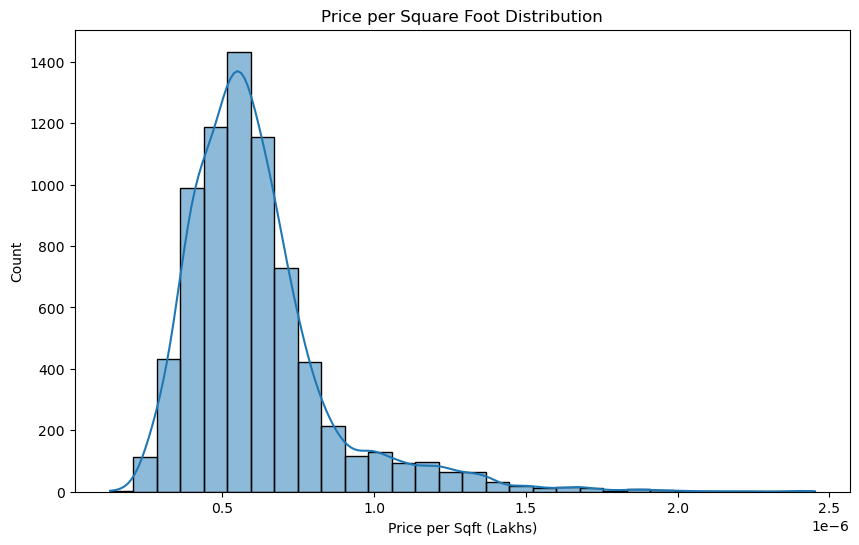

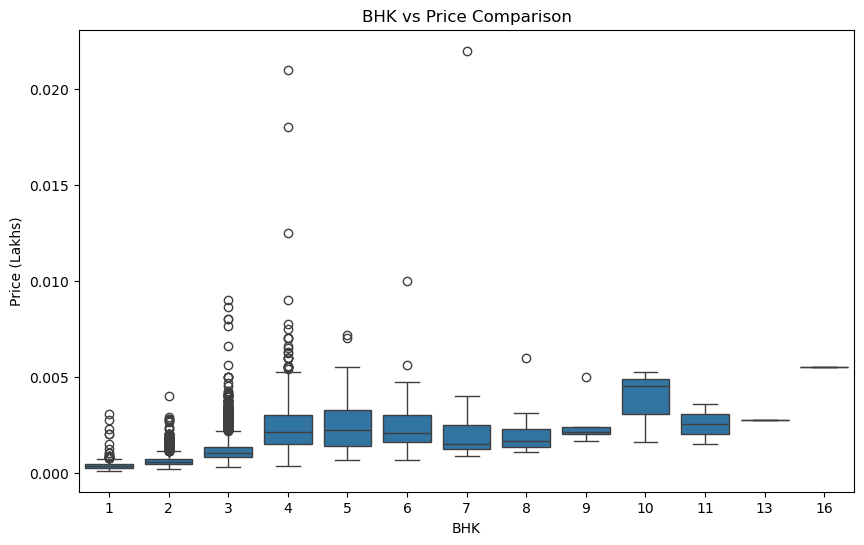

C:\Users\AMBAR KUMAR\AppData\Local\Temp\ipykernel_19476\1504236241.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bath', data=df, palette='Set2')


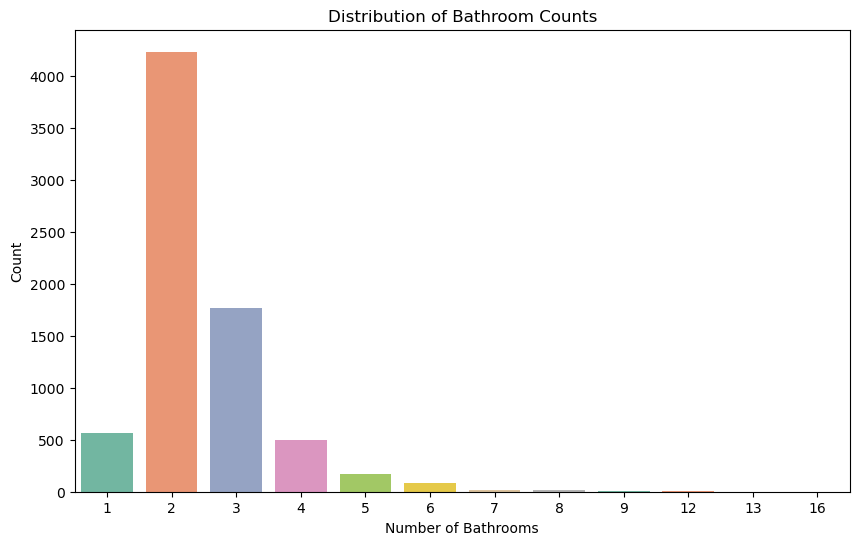

Skewness of Price: 6.262704108631431
Kurtosis of Price: 90.77349076112783


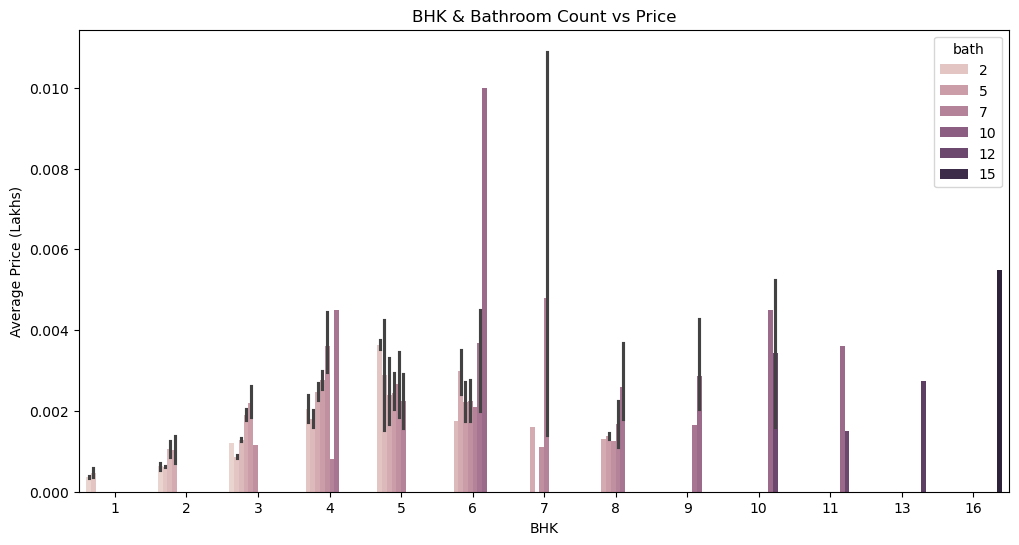

In [33]:
# Exploratory data analysis

# Convert price to Lakhs for better readability
df = pd.read_csv('data.csv')
df['price'] = df['price'] / 100000  

# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (Lakhs)')
plt.show()

# Price vs. Square Feet
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=df, alpha=0.5)
plt.title('Price vs Total Square Feet')
plt.xlabel('Total Sqft')
plt.ylabel('Price (Lakhs)')
plt.show()

# Top 10 Locations by Average Price
top_locations = df['location'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='price', data=df[df['location'].isin(top_locations)], estimator=np.mean)
plt.title('Average Price in Top 10 Locations')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Average Price (Lakhs)')
plt.show()

# Correlation Heatmap
numerical_features = ['total_sqft', 'bath', 'bhk', 'price']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Box Plot for Outliers in Price
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title('Box Plot of House Prices')
plt.ylabel('Price (Lakhs)')
plt.show()

# Pair Plot to Visualize Feature Relationships
sns.pairplot(df[['total_sqft', 'bath', 'bhk', 'price']])
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

# Price per Square Foot Analysis
df['price_per_sqft'] = df['price'] / df['total_sqft']
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Price per Square Foot Distribution')
plt.xlabel('Price per Sqft (Lakhs)')
plt.show()

# BHK vs Price Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='bhk', y='price', data=df)
plt.title('BHK vs Price Comparison')
plt.xlabel('BHK')
plt.ylabel('Price (Lakhs)')
plt.show()

# Bathroom Count Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='bath', data=df, palette='Set2')
plt.title('Distribution of Bathroom Counts')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

# Skewness & Kurtosis Check
from scipy.stats import skew, kurtosis

print(f"Skewness of Price: {skew(df['price'])}")
print(f"Kurtosis of Price: {kurtosis(df['price'])}")

# Price Trends by BHK & Bathrooms
plt.figure(figsize=(12, 6))
sns.barplot(x='bhk', y='price', hue='bath', data=df)
plt.title('BHK & Bathroom Count vs Price')
plt.xlabel('BHK')
plt.ylabel('Average Price (Lakhs)')
plt.show()

In [37]:
# Model Training with Hyperparameter Tuning & Saving
def train_model():
    X, y, _ = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('loc', OneHotEncoder(handle_unknown='ignore'), ['location']),
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), ['total_sqft', 'bath', 'bhk'])
        ]
    )
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
    
    param_grid = {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("\nModel Evaluation Metrics:")
    print(f"Best Params: {grid_search.best_params_}")
    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R-squared: {r2:.2f}\n")
    
    joblib.dump(best_model, 'house_price_model.pkl')
    print("Model saved as 'house_price_model.pkl'")
    return best_model

# Load Model Function
def load_saved_model():
    return joblib.load('house_price_model.pkl')


In [39]:
#GUI for Prediction

import tkinter as tk
from tkinter import ttk, messagebox
from PIL import ImageTk, Image
import pandas as pd
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

train_model()
load_saved_model()

class PricePredictorApp:
    def __init__(self, master):
        self.master = master
        master.title("SMART PROPERTY VALUATION")
        master.geometry("800x600")
        
        # Load background image
        try:
            self.bg_image = ImageTk.PhotoImage(Image.open("background.png"))
            bg_label = tk.Label(master, image=self.bg_image)
            bg_label.place(x=0, y=0, relwidth=1, relheight=1)
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load background: {str(e)}")
            master.destroy()
            return

        # Main container frame
        self.main_frame = tk.Frame(master, bg="#e3e8c5", bd=5, relief=tk.GROOVE)
        self.main_frame.place(relx=0.5, rely=0.5, anchor="center")

        # Load model
        try:
            self.model = joblib.load('house_price_model.pkl')
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load model: {str(e)}")
            master.destroy()
            return

        # Load locations
        try:
            df = pd.read_csv('data.csv')
            self.locations = df['location'].unique().tolist()
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load data: {str(e)}")
            master.destroy()
            return

        # Styling
        style = ttk.Style()
        style.configure("TCombobox", padding=5, font=("Arial", 12))
        style.configure("TButton", font=("Arial", 12, "bold"), padding=10, background="#4CAF50")
        style.map("TButton", background=[("active", "#6493de")])

        # GUI Components
        ttk.Label(self.main_frame, text="Smart Property Valuation", 
                font=("Arial", 16, "bold"), background="#6493de").grid(row=0, columnspan=2, pady=15)

        # Location
        ttk.Label(self.main_frame, text="Location:", font=("Arial", 12), background="#edbfb4").grid(row=1, padx=10, pady=8, sticky="w")
        self.location_var = tk.StringVar()
        self.location_cb = ttk.Combobox(self.main_frame, textvariable=self.location_var, 
                                      values=self.locations, font=("Arial", 12), width=25)
        self.location_cb.grid(row=1, column=1, padx=10, pady=8)

        # Sqft
        ttk.Label(self.main_frame, text="Total Sqft:", font=("Arial", 12), background="#edbfb4").grid(row=2, padx=10, pady=8, sticky="w")
        self.sqft_entry = ttk.Entry(self.main_frame, font=("Arial", 12))
        self.sqft_entry.grid(row=2, column=1, padx=10, pady=8)

        # Bathrooms
        ttk.Label(self.main_frame, text="Bathrooms:", font=("Arial", 12), background="#edbfb4").grid(row=3, padx=10, pady=8, sticky="w")
        self.bath_entry = ttk.Entry(self.main_frame, font=("Arial", 12))
        self.bath_entry.grid(row=3, column=1, padx=10, pady=8)

        # BHK
        ttk.Label(self.main_frame, text="BHK:", font=("Arial", 12), background="#edbfb4").grid(row=4, padx=10, pady=8, sticky="w")
        self.bhk_entry = ttk.Entry(self.main_frame, font=("Arial", 12))
        self.bhk_entry.grid(row=4, column=1, padx=10, pady=8)

        # Predict Button
        self.predict_btn = ttk.Button(self.main_frame, text="Predict Price", 
                                    command=self.predict_price, style="TButton")
        self.predict_btn.grid(row=5, columnspan=2, pady=15)

        # Result Label
        self.result_label = ttk.Label(self.main_frame, text="", 
                                    font=("Arial", 14, "bold"), background="#dcf7f3")
        self.result_label.grid(row=6, columnspan=2)

    def predict_price(self):
        try:
            input_data = pd.DataFrame([[
                self.location_var.get(),
                float(self.sqft_entry.get()),
                float(self.bath_entry.get()),
                float(self.bhk_entry.get())
            ]], columns=['location', 'total_sqft', 'bath', 'bhk'])
            
            prediction = self.model.predict(input_data)[0]
            self.result_label.config(text=f"Predicted Price: ₹{prediction:,.2f} Lakhs", foreground="#2c3e50")
        except ValueError:
            self.result_label.config(text="Please enter valid numbers in all fields", foreground="red")
        except Exception as e:
            self.result_label.config(text=f"Error: {str(e)}", foreground="red")

if __name__ == "__main__":
    root = tk.Tk()
    app = PricePredictorApp(root)
    root.mainloop()


Model Evaluation Metrics:
Best Params: {'regressor__max_depth': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
MSE: 1531.46, RMSE: 39.13, R-squared: 0.83

Model saved as 'house_price_model.pkl'
